In [131]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore")
from matplotlib import cm

## 导入数据集

In [48]:
homeworkOri = pd.DataFrame(pd.read_csv('../dataset/INvideos.csv'))

In [49]:
homeworkOri.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [50]:
homeworkOri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

## 查看数据属性
#### 从数据描述中可以看出数据可以分为如下几类：
#### 1. 数值属性 包括 category_id, views, likes, dislikes, comment_count
#### 2. 布尔属性 包括 comments_disabled, ratings_disabled, video_error_or_removed
#### 3. 其余均是以字符串描述的属性

#### 可以看出仅description属性存在缺失值

In [142]:
for key in homeworkOri.keys():
    print("{:>22}:{} missing values".format(key,homeworkOri[key].isna().sum()))

              video_id:0 missing values
         trending_date:0 missing values
                 title:0 missing values
         channel_title:0 missing values
           category_id:0 missing values
          publish_time:0 missing values
                  tags:0 missing values
                 views:0 missing values
                 likes:0 missing values
              dislikes:0 missing values
         comment_count:0 missing values
        thumbnail_link:0 missing values
     comments_disabled:0 missing values
      ratings_disabled:0 missing values
video_error_or_removed:0 missing values
           description:0 missing values


## 标称属性计数(仅是否可评论）

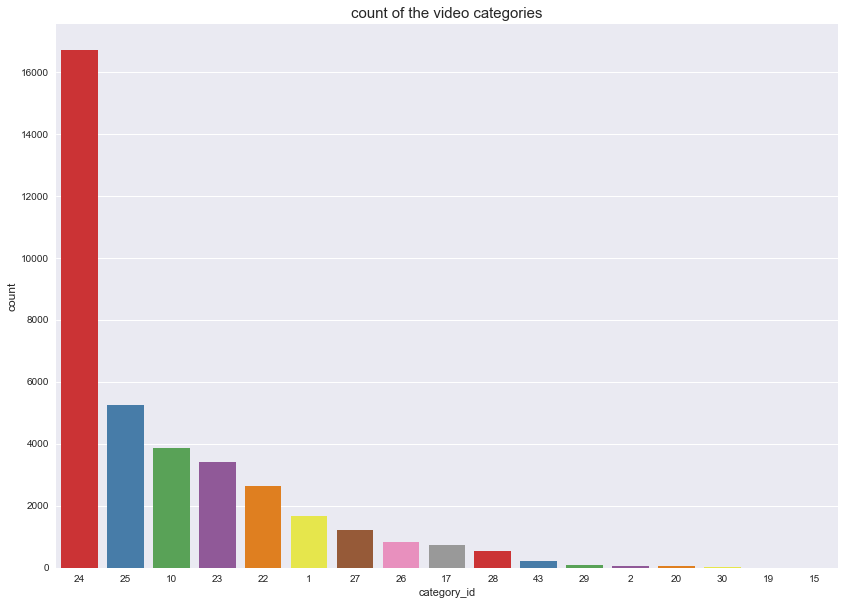

In [59]:
plt.figure(figsize=(14,10))
g=sns.countplot('category_id',data=homeworkOri,palette="Set1",order=homeworkOri['category_id'].value_counts().index)
g.set_title('count of the video categories',fontsize=15)
g.set_ylabel("count",fontsize=12)
plt.show()

## 数值属性五数描述

In [54]:
dislikes = pd.DataFrame(homework1['dislikes'])
dislikes.describe()

,dislikes
count,3.735200e+04
mean,1.665082e+03
std,1.607617e+04
min,0.000000e+00
25%,1.080000e+02
50%,3.260000e+02
75%,1.019250e+03
max,1.545017e+06


#### 可以看出缺失值个数为0

In [55]:
dislikes[dislikes.isna().any(axis=1)].count()

dislikes    0
dtype: int64

## 数据可视化

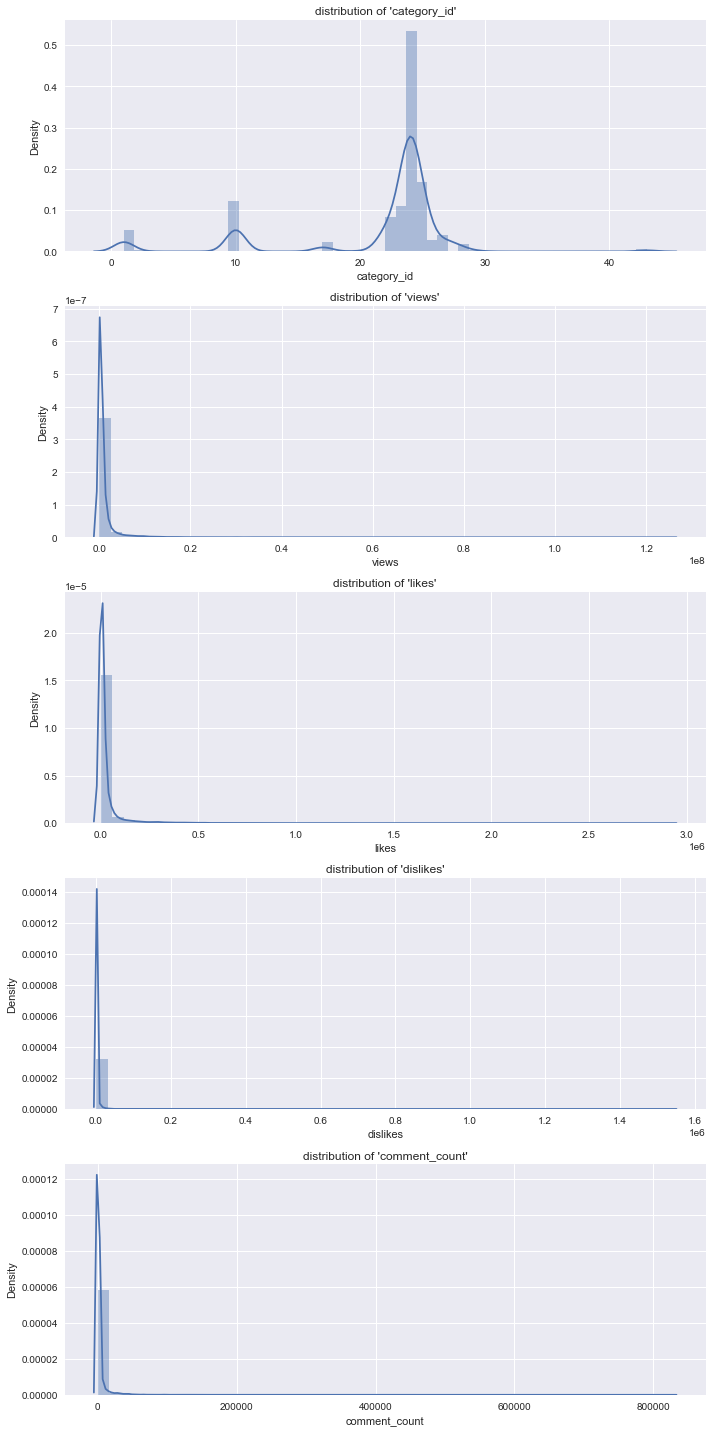

In [56]:
fig,plots=plt.subplots(5,1,figsize=(10,20))
plots=plots.flatten()
labels=['category_id','views','likes','dislikes','comment_count']
for i in range(len(labels)):
    plots[i]=sns.distplot(homeworkOri[labels[i]],ax=plots[i])
    plots[i].set_title("distribution of '{}'".format(labels[i]))

plt.tight_layout()

## 可以看出，除了category_id以外，其他的数值属性均存在分布不平衡的状态，因此这里我们进行一步取对数操作来使得分布更平衡，由于原数据集存在0值，因此这里统一加一进行处理

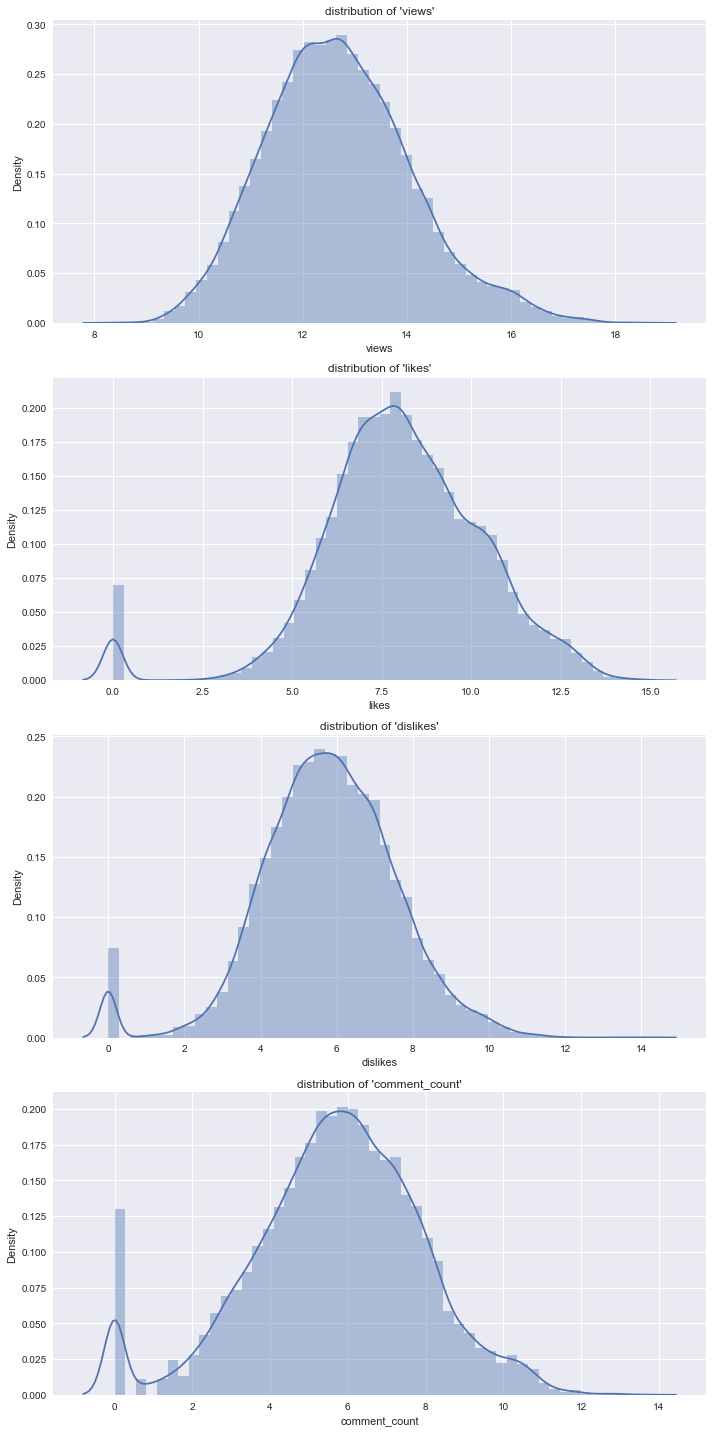

In [58]:
homeworkOri['views']=np.log(homeworkOri['views']+1)
homeworkOri['likes']=np.log(homeworkOri['likes']+1)
homeworkOri['dislikes']=np.log(homeworkOri['dislikes']+1)
homeworkOri['comment_count']=np.log(homeworkOri['comment_count']+1)
new_labels=['views','likes','dislikes','comment_count']
fig,plots=plt.subplots(4,1,figsize=(10,20))
for i in range(len(new_labels)):
    plots[i]=sns.distplot(homeworkOri[new_labels[i]],ax=plots[i])
    plots[i].set_title("distribution of '{}'".format(new_labels[i]))

plt.tight_layout()

## 画出盒图

In [60]:
homeworkBox=pd.DataFrame(pd.read_csv('../dataset/INvideos.csv'))

<AxesSubplot:>

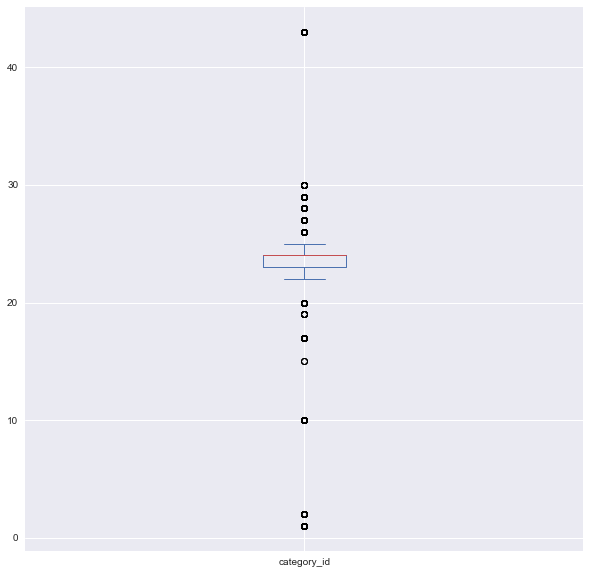

In [61]:
homeworkBox['category_id'].plot.box(figsize=(10,10))

## 根据数据描述，仅description项存在缺失值，采用出现频率最高值对description进行填充

In [64]:
description=pd.DataFrame(homework0['description'])
li=description[description.isna().any(axis=1)].index.values.tolist()

#### 获取出现频率最高的description

In [80]:
freq = homeworkOri.groupby(['description']).count()
description_fill = freq.sort_values(by='video_id',ascending=False,axis=0)
description_fill=description_fill.index.values[0]
description_fill

'Subscribers Link: http://bit.ly/2qb69dZ\\n\\nConnect with Radaan Media online: http://bit.ly/2rGVWHT\\n\\nVisit our WEBSITE: https://www.radaan.tv\\n\\nLike us on FACEBOOK: http://bit.ly/2qLmgTm\\n\\nFollow us on TWITTER: http://bit.ly/2r8gZGD\\n\\nVAANI RANI SYNOPSIS\\nTwin sister’s Vaani and Rani get married to an elder and younger brother of the same family respectively. Vaani the elder one is a well read attorney and the younger one Rani is a failure in education with not even going beyond 10thclass. Though both have extreme ideologies of life Rani is a favorite among neighbors with her uncanny innocent approach. Vaani is a roaring lion at the court room who is looked up as a role model to so many upcoming lawyers for her advocating abilities, whereas Rani is a well versed home maker. Not only with the sisters remain with this extremity but even their respective husband’s share the same dose of luck….Vaani is a mother of 2 children and Rani has three children who are in their teen

#### 进行填充

In [83]:
for item in li:
    homeworkOri.loc[item,('description')]= description_fill

In [84]:
homeworkOri.iloc[li]['description']

24       Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
25       Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
36       Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
78       Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
158      Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
                               ...                        
36936    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
36986    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
37060    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
37115    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
37287    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
Name: description, Length: 561, dtype: object

## 原数据库仅缺失非数值属性，如果要利用属性间的相关关系和数据对象之间的联系填充值，需要人为制造数据缺失

In [132]:
homework_loss = pd.DataFrame(pd.read_csv('../dataset/INvideos.csv'))
homework_loss.loc[15,('views')]=None
homework_loss.loc[15]

video_id                                                        7gShaSuK_PY
trending_date                                                      17.14.11
title                     ஜெயலலிதாவின் உயில் சிக்கியது  அப்பல்லோ சி.டி.ய...
channel_title                                                      Next Gen
category_id                                                              22
publish_time                                       2017-11-13T06:52:47.000Z
tags                      nextgen|"sasikala"|"sasikala natarajan"|"aiadm...
views                                                                   NaN
likes                                                                   238
dislikes                                                                 59
comment_count                                                            18
thumbnail_link               https://i.ytimg.com/vi/7gShaSuK_PY/default.jpg
comments_disabled                                                     False
ratings_disa

#### 根据元素之间的相关关系进行填充

In [122]:
numerical_df=homeworkOri[['views','likes','dislikes','comment_count']]

#### 首先确定几个数值的相关系数，并画出热量图

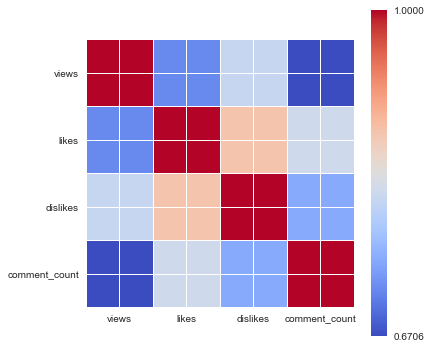

In [123]:
corr_matrix=numerical_df.corr()
fig,ax=plt.subplots(figsize=(6,6))
heatmap=ax.imshow(corr_matrix,interpolation='nearest',cmap=cm.coolwarm)
cbar_min=corr_matrix.min().min()
cbar_max=corr_matrix.max().max()
cbar=fig.colorbar(heatmap,ticks=[cbar_min,cbar_max])

labels=['','views','','likes','','dislikes','','comment_count']
ax.set_yticklabels(labels,minor=False)
ax.set_xticklabels(labels,minor=False)

plt.show()

#### 利用一阶线性回归来拟合缺失值，使用未缺失值进行训练，然后利用其余值进行拟合

In [124]:
regression=numerical_df.dropna()

In [125]:
min_max_scaler=preprocessing.MinMaxScaler()
numerical_scaled=pd.DataFrame(min_max_scaler.fit_transform(numerical_df)).rename(columns={0:'views',1:'likes',2:'dislikes',3:'comment_count'})

#### 利用线性回归模型进行拟合

In [126]:
model=LinearRegression()
model.fit(numerical_scaled[['likes','dislikes','comment_count']],numerical_scaled[['views']])

LinearRegression()

In [129]:
for item in [[15]]:
    homework_loss.loc[item,('views')]=int(model.predict(np.array(homework_loss.iloc[item][['likes','dislikes','comment_count']]).reshape(-1,3)))

#### 根据结果可以看出此时已经成功进行了填充

In [130]:
homework_loss.loc[15]

video_id                                                        7gShaSuK_PY
trending_date                                                      17.14.11
title                     ஜெயலலிதாவின் உயில் சிக்கியது  அப்பல்லோ சி.டி.ய...
channel_title                                                      Next Gen
category_id                                                              22
publish_time                                       2017-11-13T06:52:47.000Z
tags                      nextgen|"sasikala"|"sasikala natarajan"|"aiadm...
views                                                                  32.0
likes                                                                   238
dislikes                                                                 59
comment_count                                                            18
thumbnail_link               https://i.ytimg.com/vi/7gShaSuK_PY/default.jpg
comments_disabled                                                     False
ratings_disa

#### 利用对象之间的相似性来进行填充

In [133]:
homework_loss = pd.DataFrame(pd.read_csv('../dataset/INvideos.csv'))
homework_loss.loc[15,('views')]=None
homework_loss.loc[15]

video_id                                                        7gShaSuK_PY
trending_date                                                      17.14.11
title                     ஜெயலலிதாவின் உயில் சிக்கியது  அப்பல்லோ சி.டி.ய...
channel_title                                                      Next Gen
category_id                                                              22
publish_time                                       2017-11-13T06:52:47.000Z
tags                      nextgen|"sasikala"|"sasikala natarajan"|"aiadm...
views                                                                   NaN
likes                                                                   238
dislikes                                                                 59
comment_count                                                            18
thumbnail_link               https://i.ytimg.com/vi/7gShaSuK_PY/default.jpg
comments_disabled                                                     False
ratings_disa

In [136]:
numerical_df=pd.DataFrame(pd.read_csv('../dataset/INvideos.csv'))[['views','likes','dislikes','comment_count']]

In [137]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=4,weights='uniform')
x=pd.DataFrame(imputer.fit_transform(numerical_df))
x=x.rename(columns={0:'likes',1:'dislikes',2:'category_id',3:'views',4:'comment_count'})

In [138]:
x.loc[15]

likes          89531.0
dislikes         238.0
category_id       59.0
views             18.0
Name: 15, dtype: float64

## 数据集2：wine Reviews

In [8]:
wineOri = pd.DataFrame(pd.read_csv('../dataset/wine/winemag-data_first150k.csv'))

## 查看数据集基本信息

In [9]:
wineOri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [10]:
wineOri.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


#### 获取标称属性每个可能取值的频数

In [45]:
print(wineOri['country'].value_counts())

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

## 将标称属性从str类型转化为数值类型，便于后续处理

In [12]:
li=pd.DataFrame(wineOri.country.value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
wineOri['country_id'] = wineOri['country'].map(dic)

In [14]:
li=pd.DataFrame(wineOri.province.value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
wineOri['province_id'] = wineOri['province'].map(dic)

In [16]:
wineOri.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_id,province_id
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0.0,0.0
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,3.0,4.0
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0.0,0.0
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,0.0,6.0
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,2.0,26.0


## 选取数值属性price

#### 获取五数属性

In [17]:
wine_price = pd.DataFrame(wineOri['price'])
wine_price.describe()

,price
count,137235.000000
mean,33.131482
std,36.322536
min,4.000000
25%,16.000000
50%,24.000000
75%,40.000000
max,2300.000000


#### 统计缺失值个数

In [35]:
wine_price[wine_price.isna().any(axis=1)].shape[0]

13695

## 数据可视化

#### 获取数值属性直方图

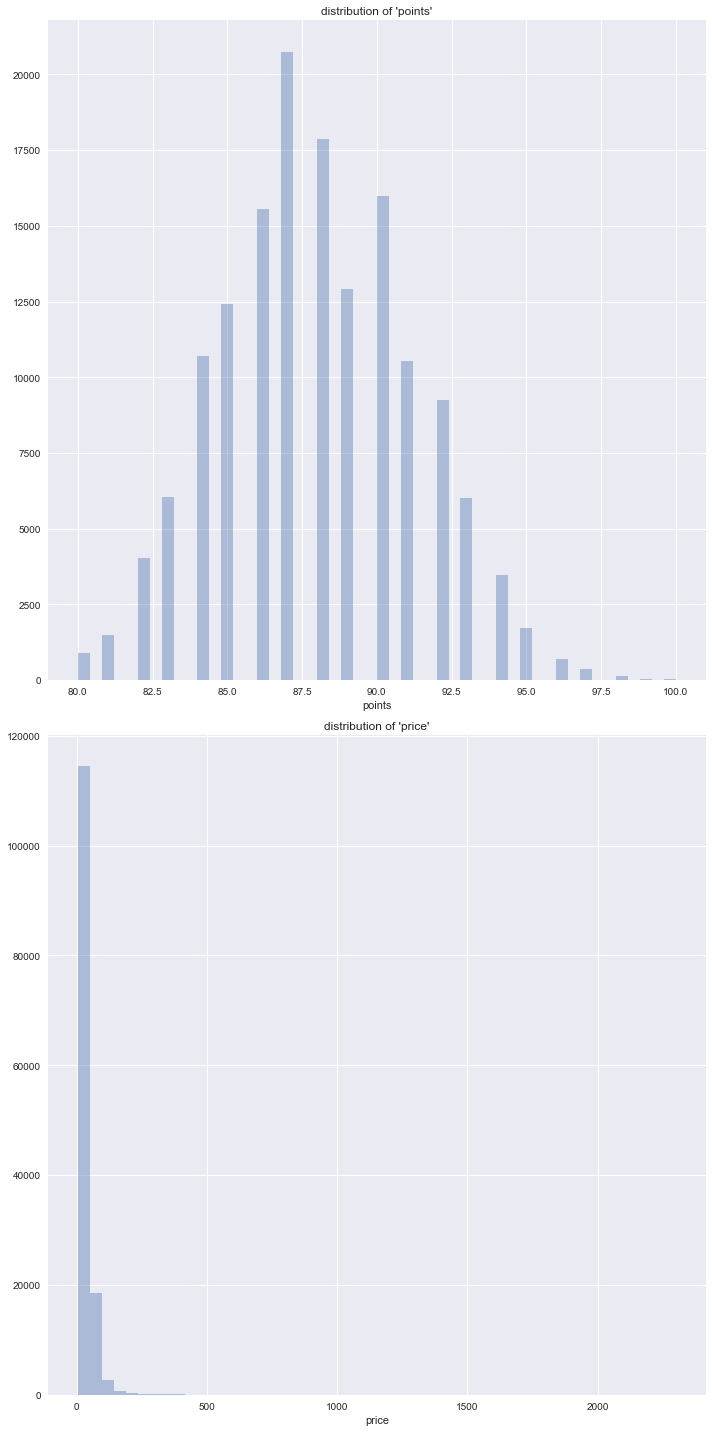

In [20]:
new_labels=['points','price']
fig,plots=plt.subplots(2,1,figsize=(10,20))
for i in range(len(new_labels)):
    plots[i]=sns.distplot(wineOri[new_labels[i]],ax=plots[i],kde=False)
    plots[i].set_title("distribution of '{}'".format(new_labels[i]))

plt.tight_layout()

#### price数据是长尾分布，因此对其进行加1取对数操作使得分布更加均匀

In [21]:
wineOri['price']=np.log(wineOri['price']+1)

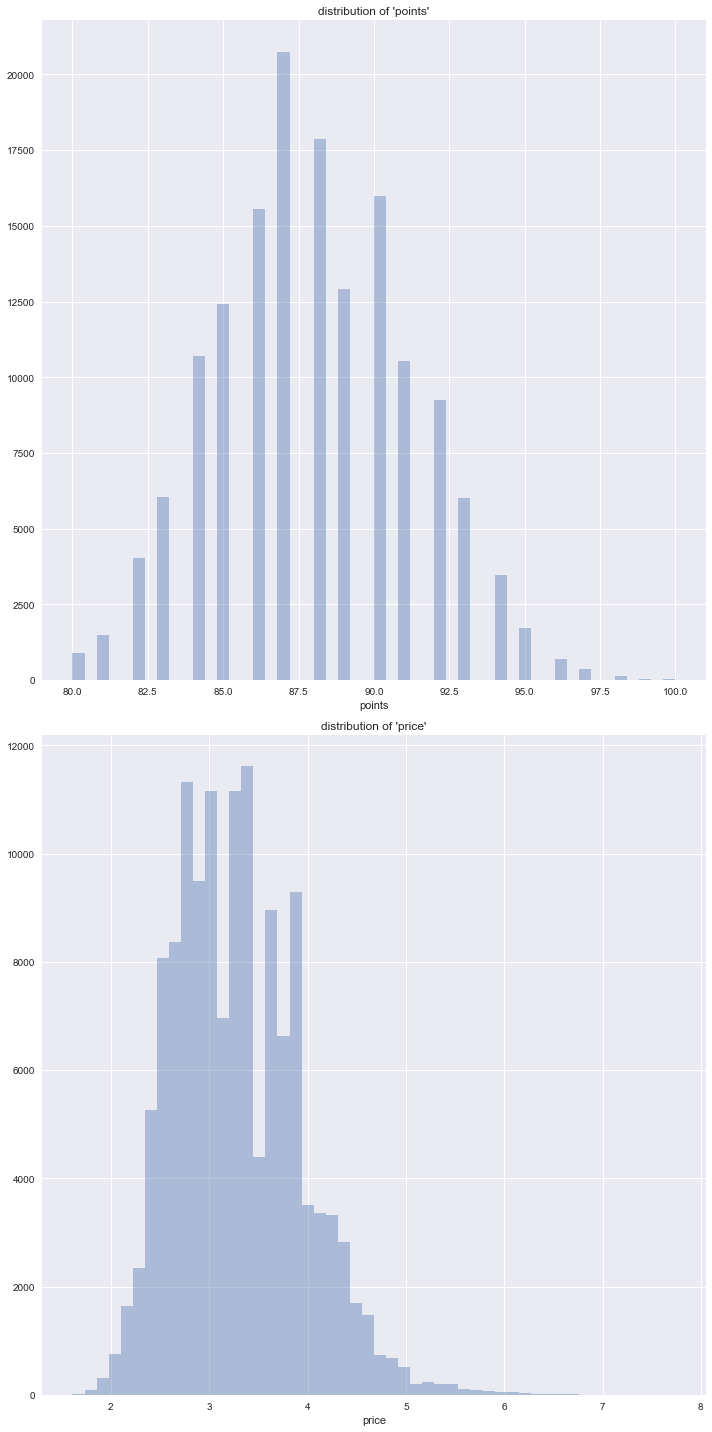

In [22]:
new_labels=['points','price']
fig,plots=plt.subplots(2,1,figsize=(10,20))
for i in range(len(new_labels)):
    plots[i]=sns.distplot(wineOri[new_labels[i]],ax=plots[i],kde=False)
    plots[i].set_title("distribution of '{}'".format(new_labels[i]))

plt.tight_layout()

#### 获取price属性和points的盒图形

<AxesSubplot:>

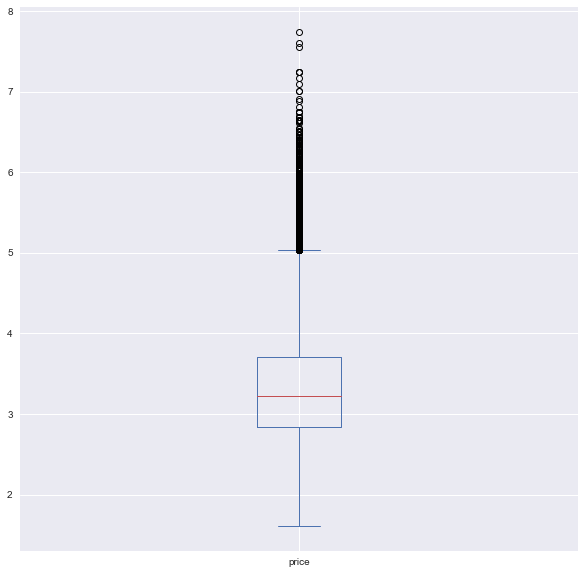

In [23]:
wineOri['price'].plot.box(figsize=(10,10))

<AxesSubplot:>

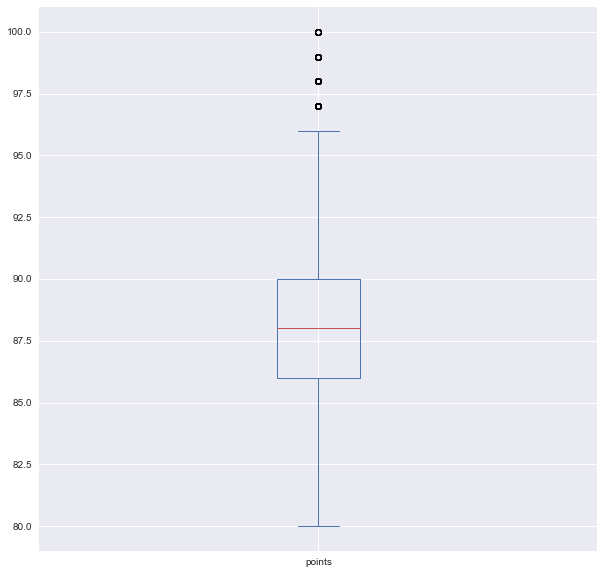

In [24]:
wineOri['points'].plot.box(figsize=(10,10))

## 进行缺失值处理

#### 直接删除缺失值

In [25]:
import copy
wine_fill = copy.deepcopy(wineOri)
dropNan=wine_fill.dropna()

#### 可以看到此时缺失值已经全部剔除

In [26]:
dropNan[dropNan.isna().any(axis=1)].shape[0]

0

#### 获取出现频率最高的price进行缺失值填充

In [28]:
price_freq = wineOri.groupby(['price']).count()
price_freqList = price_freq.sort_values(by = 'country',ascending=False,axis=0)
re_price = price_freqList.index[0]
re_price

3.044522437723423

#### 获取缺失值所在索引并进行填充

In [30]:
lost_price = pd.DataFrame(wineOri['price'])
lost_priceList = lost_price[lost_price.isna().any(axis=1)].index.values.tolist()
for item in lost_priceList:
    wine_fill.loc[item,('price')]=re_price

#### 可以看出此时缺失值已经填充

In [31]:
wine_fill.loc[lost_priceList]['price']

32        3.044522
56        3.044522
72        3.044522
82        3.044522
116       3.044522
            ...   
150377    3.044522
150378    3.044522
150587    3.044522
150673    3.044522
150922    3.044522
Name: price, Length: 13695, dtype: float64

#### 获取原dataframe中的数值属性

In [33]:
numerical = wineOri[['points','price','country_id','province_id']].dropna()
numerical.head()

,points,price,country_id,province_id
0,96,5.463832,0.0,0.0
1,96,4.709530,3.0,4.0
2,96,4.510860,0.0,0.0
3,96,4.189655,0.0,6.0
4,95,4.204693,2.0,26.0


#### 利用属性之间的相关关系进行填充

In [35]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5)
model.fit(numerical[['country_id','points','province_id']],numerical['price'])

DecisionTreeRegressor(max_depth=5)

In [38]:
for item in lost_priceList:
    wine_fill.loc[item,('price')]=model.predict(np.array(wineOri.loc[item][['country_id','points','province_id']]).reshape(-1,3))

#### 可以看出此时以另外一种方式对缺失值进行了填充

In [41]:
wine_fill.loc[lost_priceList]['price']

32        3.635083
56        3.635083
72        3.703665
82        3.703665
116       2.662778
            ...   
150377    2.874043
150378    2.874043
150587    3.413570
150673    3.309300
150922    3.703665
Name: price, Length: 13695, dtype: float64

#### 通过数据对象之间的相似性进行填充

In [43]:
wine_fill = copy.deepcopy(wineOri)
wine_fill = wine_fill[['price','country_id','province_id','points']]
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=4,weights='uniform')
result=pd.DataFrame(imputer.fit_transform(wine_fill))
result=result.rename(columns={0:'price',1:'country_id',2:'province_id',3:'points'})

#### 可以看出此时已经没有缺失值

In [44]:
result[result.isna().any(axis=1)].shape[0]

0